**GAYATRI KALIDINDI**

**DATA SCIENCE/ML CHALLENGE**

Analyzing the data by word cloud and sentiment analysis.

In [ ]:
# Importing the useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import string
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# uploading the given data file
from google.colab import  files
uploaded = files.upload()

Saving Eluvio_DS_Challenge.csv to Eluvio_DS_Challenge.csv


In [ ]:
# converting the csv file into pandas dataframe
df = pd.read_csv('Eluvio_DS_Challenge.csv')

In [ ]:
all_words = " ".join(df['title'].str.lower())

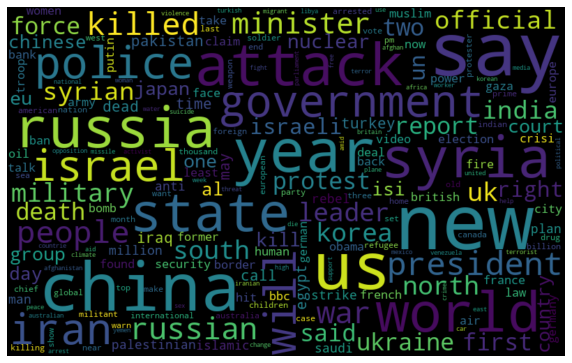

In [ ]:
#creating the word cloud for given data
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Tokenizing the given data
from nltk import word_tokenize
nltk.download('punkt')
words_tokenized = [[w.lower() for w in word_tokenize(t)] for t in df['title']]
df['tokenized_title'] = words_tokenized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
all_words = pd.Series(np.concatenate(words_tokenized)).value_counts()

In [ ]:
#Data cleaning
# Removing punctuations and stopwords in the data
from nltk.corpus import stopwords
import string

stopwords = set(stopwords.words('english'))
all_words = all_words[[word not in stopwords for word in all_words.index]]
all_words = all_words[[word not in string.punctuation for word in all_words.index]]

In [ ]:
# Importing sentiment analyzer from VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
senti = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['scores'] = df['title'].apply(lambda title: senti.polarity_scores(title))
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,tokenized_title,scores
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,"[scores, killed, in, pakistan, clashes]","{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp..."
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,"[japan, resumes, refuelling, mission]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,"[us, presses, egypt, on, gaza, border]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,"[jump-start, economy, :, give, health, care, t...","{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp..."
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,"[council, of, europe, bashes, eu, &, un, terro...","{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp..."


In [ ]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,tokenized_title,scores,compound
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,"[scores, killed, in, pakistan, clashes]","{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,"[japan, resumes, refuelling, mission]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,"[us, presses, egypt, on, gaza, border]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,"[jump-start, economy, :, give, health, care, t...","{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,"[council, of, europe, bashes, eu, &, un, terro...","{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.5267


In [ ]:
df['comp_sc'] = df['compound'].apply(lambda c : 'pos' if c>=0 else 'neg')
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,tokenized_title,scores,compound,comp_sc
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,"[scores, killed, in, pakistan, clashes]","{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",-0.6705,neg
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,"[japan, resumes, refuelling, mission]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,"[us, presses, egypt, on, gaza, border]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,"[jump-start, economy, :, give, health, care, t...","{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939,pos
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,"[council, of, europe, bashes, eu, &, un, terro...","{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.5267,neg
